In [33]:

from tensorflow.keras.datasets import cifar10

from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

from tensorflow.keras.optimizers import RMSprop, SGD

In [34]:
# loading dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [35]:
#combining and spliting datset in 80-20 ratio

x = np.concatenate((x_train, x_test), axis=0)
print(f"x total: {x.shape}")

y = np.concatenate((y_train, y_test), axis=0)
print(f"y total: {y.shape}")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# after split data
print("training data:", x_train.shape)
print("test data:", x_test.shape)

print("unique labels:", len(np.unique(y_train)))

x total: (60000, 32, 32, 3)
y total: (60000, 1)
training data: (48000, 32, 32, 3)
test data: (12000, 32, 32, 3)
unique labels: 10


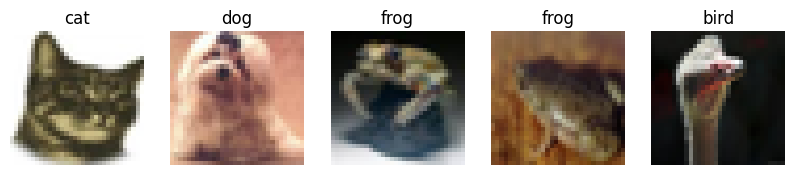

In [36]:
#sample images
class_names = ['airplane', 'automobile','bird','cat' ,'deer' ,'dog', 'frog','horse', 'ship', 'truck']

plt.figure(figsize=(10,2))

for i in range(5):
    plt.subplot(1, 5, i+1)

    plt.imshow(x_train[i])

    plt.title(class_names[y_train[i][0]])

    plt.axis('off')

plt.show()



In [37]:
#normalizing pixel values - so it remain a pixel color value only, max value is 255

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [38]:
#one-hot encode labels - categories

y_train_cat = to_categorical(y_train, 10)

y_test_cat = to_categorical(y_test, 10)


In [44]:

# creating a model

shape = (32,32,3)
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape= shape),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.10),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),


    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.25),

    Dense(64, activation='relu'),
    Dropout(0.25),

    Dense(64, activation='relu'),
    Dropout(0.25),

    Dense(32, activation='relu'),
    Dropout(0.10),

    Dense(10, activation='softmax')
])

#I'm getting Good accuracy with this optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# similar accuracy as RMS
# model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# not getting good accuracy with RMS optimizer
# model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


# training
history = model.fit(x_train, y_train_cat, epochs=16, batch_size=64, validation_split=0.2)


Epoch 1/16
600/600 ━━━━━━━━━━━━━━━━━━━━ 63s 100ms/step - accuracy: 0.1663 - loss: 2.1448 - val_accuracy: 0.3719 - val_loss: 1.6591
Epoch 2/16
600/600 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.3770 - loss: 1.6563 - val_accuracy: 0.4580 - val_loss: 1.5059
Epoch 3/16
600/600 ━━━━━━━━━━━━━━━━━━━━ 61s 102ms/step - accuracy: 0.4675 - loss: 1.4705 - val_accuracy: 0.5434 - val_loss: 1.2802
Epoch 4/16
600/600 ━━━━━━━━━━━━━━━━━━━━ 79s 97ms/step - accuracy: 0.5074 - loss: 1.3626 - val_accuracy: 0.5740 - val_loss: 1.1797
Epoch 5/16
600/600 ━━━━━━━━━━━━━━━━━━━━ 57s 95ms/step - accuracy: 0.5479 - loss: 1.2741 - val_accuracy: 0.5908 - val_loss: 1.1713
Epoch 6/16
600/600 ━━━━━━━━━━━━━━━━━━━━ 60s 100ms/step - accuracy: 0.5755 - loss: 1.2274 - val_accuracy: 0.6048 - val_loss: 1.1710
Epoch 7/16
600/600 ━━━━━━━━━━━━━━━━━━━━ 81s 97ms/step - accuracy: 0.5889 - loss: 1.1810 - val_accuracy: 0.6297 - val_loss: 1.0587
Epoch 8/16
600/600 ━━━━━━━━━━━━━━━━━━━━ 79s 93ms/step - accuracy: 0.6081 - loss: 1.1344

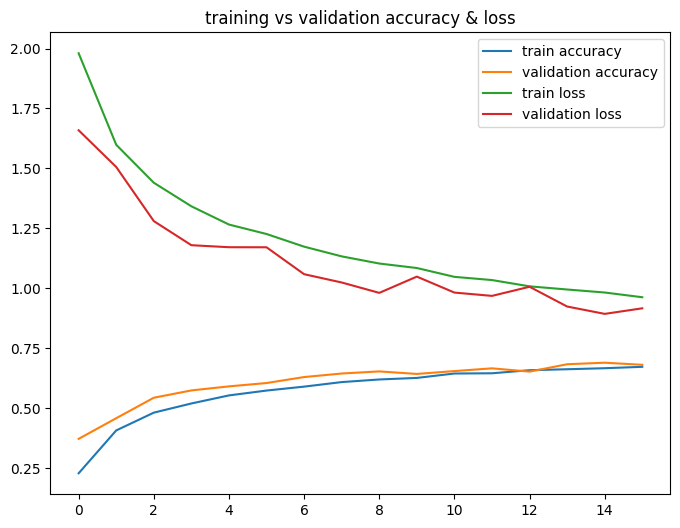

In [45]:
plt.figure(figsize=(8,6))

plt.plot(history.history['accuracy'], label='train accuracy')

plt.plot(history.history['val_accuracy'], label='validation accuracy')

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')

plt.legend()
plt.title("training vs validation accuracy & loss")
plt.show()


In [46]:
# evaluating
from sklearn.metrics import  precision_score, recall_score, f1_score
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)


print("test accuracy:", test_accuracy)
print("test loss:", test_loss)

#predicting
y_pred = model.predict(x_test)

y_pred_cl = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

#report
print(classification_report(y_true, y_pred_cl, target_names=class_names))

375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6856 - loss: 0.9203
test accuracy: 0.687250018119812
test loss: 0.9157446026802063
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step
              precision    recall  f1-score   support

    airplane       0.74      0.72      0.73      1181
  automobile       0.85      0.85      0.85      1188
        bird       0.57      0.57      0.57      1232
         cat       0.52      0.38      0.44      1274
        deer       0.56      0.79      0.66      1179
         dog       0.71      0.41      0.52      1230
        frog       0.61      0.87      0.72      1123
       horse       0.82      0.70      0.76      1217
        ship       0.76      0.84      0.80      1189
       truck       0.80      0.80      0.80      1187

    accuracy                           0.69     12000
   macro avg       0.69      0.69      0.68     12000
weighted avg       0.69      0.69      0.68     12000



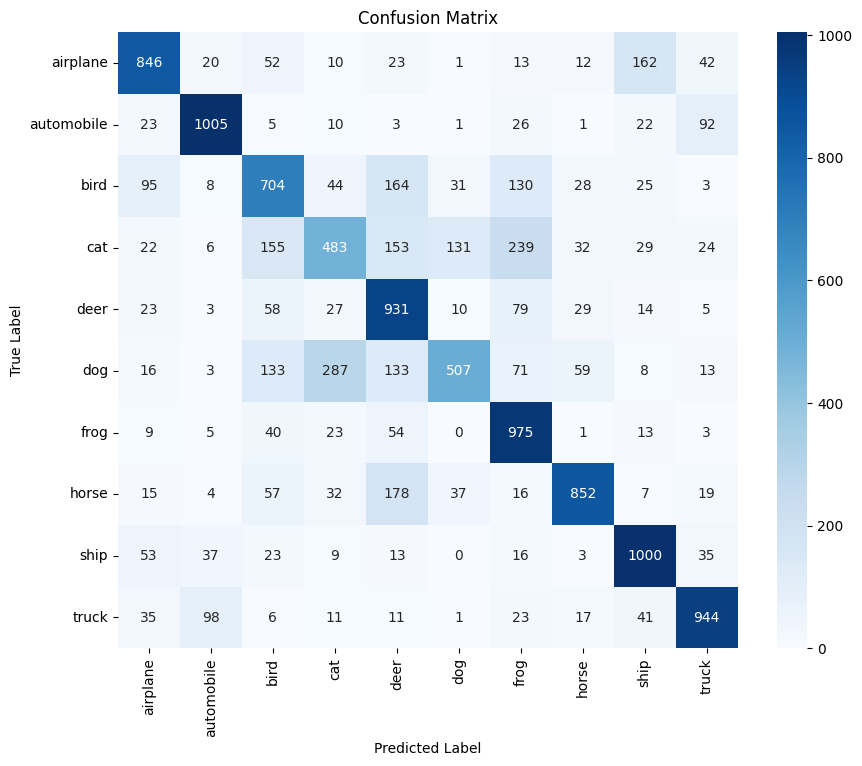

In [47]:
#confusion matrix

cm = confusion_matrix(y_true, y_pred_cl)

plt.figure(figsize=(10,8))

sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")

plt.title("Confusion Matrix")

plt.ylabel("True Label")
plt.xlabel("Predicted Label")


plt.show()